In [16]:
# Importation des bibliothèques et modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder


In [101]:
# Charger jeu de données
x = pd.read_csv('../data/dataset.csv')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [113]:
# print(x.CAEC)

print((x[x.CAEC == 0]).shape[0])
print((x[x.CAEC == 1]).shape[0])
print((x[x.CAEC == 2]).shape[0])
print((x[x.CAEC == 3]).shape[0])


0       2
1       2
2       2
3       2
4       2
       ..
2106    2
2107    2
2108    2
2109    2
2110    2
Name: CAEC, Length: 2111, dtype: int64
53
242
1765
51


In [48]:
##### Analyse des données #####

# Regarder la répartition des données selon les différentes valeurs de la variable cible
multi_classe = x['NObeyesdad'].unique()

for i in multi_classe :
    print(i, x[x['NObeyesdad'] == i].shape[0])

## Résultat ##
## Pas besoin de sous/sur échantillonage car les données sont bien répartis
## On a pas un type de variable cible qui est sous/sur représenté par rapport aux autres

Normal_Weight 287
Overweight_Level_I 290
Overweight_Level_II 290
Obesity_Type_I 351
Insufficient_Weight 272
Obesity_Type_II 297
Obesity_Type_III 324


In [55]:
# Séparation de la variable cible
y =  x.pop('NObeyesdad')
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [127]:
#### Transformer la variable cible en variable cible binaire

# Utiliser LabelEncoder pour convertir les classes en labels numériques
label_encoder = LabelEncoder()
labels_numeriques = label_encoder.fit_transform(y)

# # Créer une nouvelle colonne binaire (1 pour une classe spécifique, 0 pour les autres)
# classe_specifique = 'Obesity_Type_I'  # Remplacez par la classe que vous souhaitez prédire
# nouvelle_colonne_binaire = (labels_numeriques == label_encoder.transform([classe_specifique])).astype(int)

# # Ajouter la nouvelle colonne binaire à votre dataframe
# x['variable_cible_binaire'] = nouvelle_colonne_binaire

classe_specifique = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']  # Remplacez par la classe que vous souhaitez prédire
# nouvelle_colonne_binaire = (labels_numeriques == label_encoder.transform([classe_specifique])).astype(int)
nouvelle_colonne_binaire = x['NObeyesdad'].isin(classe_specifique).astype(int)
# Ajouter la nouvelle colonne binaire à votre dataframe
x['variable_cible_binaire'] = nouvelle_colonne_binaire

x[x['variable_cible_binaire'] == True].shape[0]

x.CAEC

0       2
1       2
2       2
3       2
4       2
       ..
2106    2
2107    2
2108    2
2109    2
2110    2
Name: CAEC, Length: 2111, dtype: int64

In [104]:
#### Transformer les valeurs de la colonne CAEC en valeur numérique
 
# Remplacez 'CAEC' par le nom réel de votre colonne contenant des chaînes de caractères
colonne_caec = x['CAEC']

# Utiliser LabelEncoder pour convertir les chaînes en labels numériques
label_encoder_caec = LabelEncoder()
colonne_caec_numerique = label_encoder_caec.fit_transform(colonne_caec)

# Remplacer la colonne d'origine par la colonne numérique
x['CAEC'] = colonne_caec_numerique


In [15]:
def preparationdonnee(dataset): 
    
    # regarder si notre dataset contient des valeurs nulls
    # print(dataset.isnull().sum())
    print(dataset.isna().sum())


    return

preparationdonnee(x)


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64


Text(0.5, 1.0, "taille en fonction de l'âge (vert pour Obesity_Type_I, rouge sinon)")

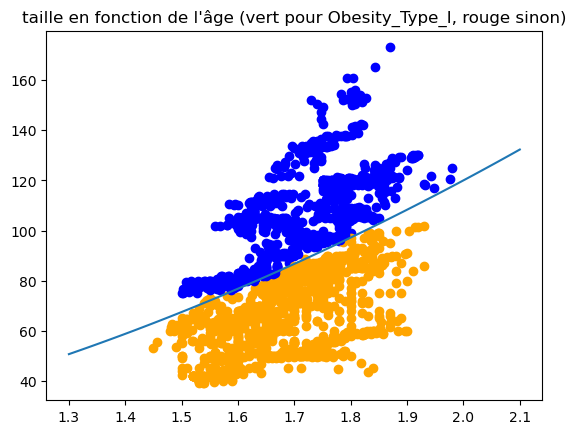

In [131]:
def get_survived_color(level_hobisity):
    return "blue" if level_hobisity else "orange"

for row in x.itertuples():
    plt.scatter(row.Height, row.Weight, color=get_survived_color(row.variable_cible_binaire))

# Définir une fonction linéaire (par exemple, y = 2x + 3)
def fonction_lineaire(x):
    return 30*(x**2)

# Générer des valeurs pour l'axe x
x_valeurs = np.linspace(1.3, 2.1, 100)

# Calculer les valeurs correspondantes sur l'axe y en utilisant la fonction linéaire
y_valeurs = fonction_lineaire(x_valeurs)

# Création du graphe
plt.plot(x_valeurs, y_valeurs, label='Droite linéaire')

plt.title("taille en fonction de l'âge (vert pour Obesity_Type_I, rouge sinon)")

# logique car on se base sur ce calcule (IMC)

In [1]:
N = 4 # 3 classes
width = 0.35     # la largeur des barres
 
print(x[x.CAEC == 0].shape[0])

# survived_per_class = [ x[x.CAEC == i].variable_cible_binaire.sum() for i in [1, 2, 3, 4] ]
# not_survived_per_class = [ np.abs(x[x.CAEC == x].variable_cible_binaire - 1).sum() for x in [1, 2, 3] ]
# ind = np.arange(N)    

# p1 = plt.bar(ind, survived_per_class, width)
# p2 = plt.bar(ind, not_survived_per_class, width,
#              bottom=survived_per_class)

# plt.ylabel('Nombre de personnes')
# plt.title('Survie par classe')
# plt.xticks(ind, ('1', '2', '3', '4'))
# plt.legend((p1[0], p2[0]), ('Obesity_Type_I', 'autre'))

NameError: name 'x' is not defined

In [ ]:
# def testermodele():

#     return